# 4 激活函数
torch.nn.functional
## 4.1 简介
在多层神经网络中，上层节点的输出和下层节点的输入之间有一个函数关系。如果这个函数我们设置为非线性函数，深层网络的表达能力将会大幅度提升，几乎可以逼近任何函数，我们把这些非线性函数叫做激活函数。

用途：激活函数的作用就是**给网络提供非线性的建模能力**。

## 4.2 常用激活函数

### Sigmoid函数
torch.sigmoid()


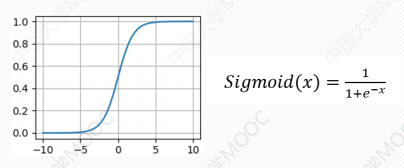

优点：很好地解释了神经元在受到刺激的情况下是否被激活和向后传递的情景。当取值接近0时几乎没有被激活，当取值接近1的时候几乎完全被激活。

缺点：
+ 容易出现梯度消失(0.9^100)，甚至小概率会出现梯度爆炸(1.1^100)问题
+ 含有幂函数，计算机在求解的时候比较耗时
+ 输出不是0均值。（经验而言，均值0效果更好）

In [1]:
import torch

x = torch.rand(4)
output = torch.sigmoid(x)

print(output)

tensor([0.6491, 0.5927, 0.7311, 0.6114])


### Tanh函数
本质是sigmoid函数的一个**变形**,两者的关系为`tanh(x)=2sigmoid(2x)-1`
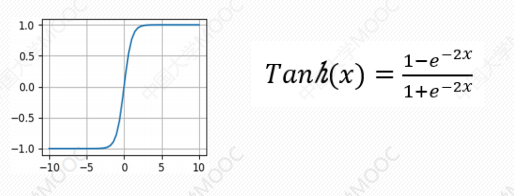

优势：
+ 将输出值映射到（-1,1）之间，因此解决了sigmoid函数的非0均值问题

缺点：
+ 存在梯度消失和梯度爆炸的问题
+ 幂运算也会导致计算耗时久

注意：为了防止饱和情况的发生，在激活函数前可以加一步batch normalization，尽可能的保证神经网络的输入在每一层都具有均值较小的0中心分布

### Relu函数(线性)
Relu是修正线性单元（The Rectified Linear Unit）的简称
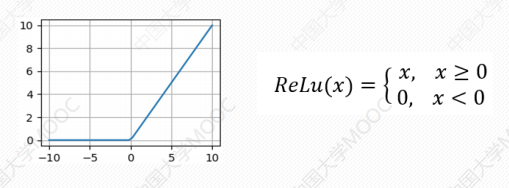

优势：
+ 不存在指数运算部分，几乎没有什么计算量
+ 具有单侧抑制(负无穷,0)、宽兴奋(0,正无穷)边界的生物学合理性

缺点：有时由于输出反复为0，神经元可能会死亡。

### LeakyRelu函数

解决一部分Relu函数存在的可能杀死神经元的问题（输出加了个斜率）

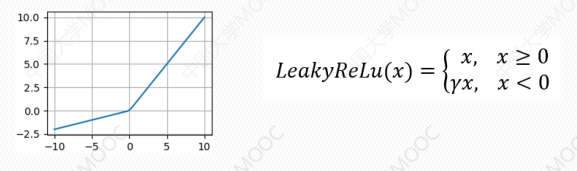

In [4]:
import torch
x = torch.rand(10)
y = torch.nn.functional.leaky_relu(x,0.03)
print(y)

tensor([0.4088, 0.5671, 0.3428, 0.2739, 0.9709, 0.2129, 0.8612, 0.4952, 0.5532,
        0.0693])
